# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

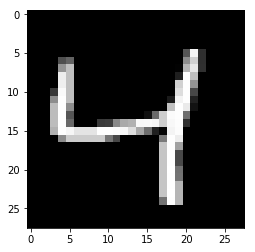

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, 784))
targets_ = tf.placeholder(tf.float32, shape=(None, 784))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6876
Epoch: 1/20... Training loss: 0.6840
Epoch: 1/20... Training loss: 0.6791
Epoch: 1/20... Training loss: 0.6738
Epoch: 1/20... Training loss: 0.6673
Epoch: 1/20... Training loss: 0.6593
Epoch: 1/20... Training loss: 0.6503
Epoch: 1/20... Training loss: 0.6380
Epoch: 1/20... Training loss: 0.6267
Epoch: 1/20... Training loss: 0.6137
Epoch: 1/20... Training loss: 0.6000
Epoch: 1/20... Training loss: 0.5867
Epoch: 1/20... Training loss: 0.5678
Epoch: 1/20... Training loss: 0.5522
Epoch: 1/20... Training loss: 0.5327
Epoch: 1/20... Training loss: 0.5147
Epoch: 1/20... Training loss: 0.4984
Epoch: 1/20... Training loss: 0.4774
Epoch: 1/20... Training loss: 0.4613
Epoch: 1/20... Training loss: 0.4447
Epoch: 1/20... Training loss: 0.4305
Epoch: 1/20... Training loss: 0.4151
Epoch: 1/20... Training loss: 0.3997
Epoch: 1/20... Training loss: 0.3875
Epoch: 1/20... Training loss: 0.3754
E

Epoch: 1/20... Training loss: 0.1803
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1754
Epoch: 1/20... Training loss: 0.1777
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1809
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1796
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1781
Epoch: 1/20... Training loss: 0.1821
E

Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1407
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1554
E

Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1353
E

Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1200
E

Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1143
E

Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1113
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1118
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1063
E

Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1070
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1075
Epoch: 7/20... Training loss: 0.1028
E

Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0967
E

Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0914
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0980
E

Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0908
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0944
E

Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0911
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0876
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0886
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0889
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0985
Epoch: 17/20... Training loss: 0.0888
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0884
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0862
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

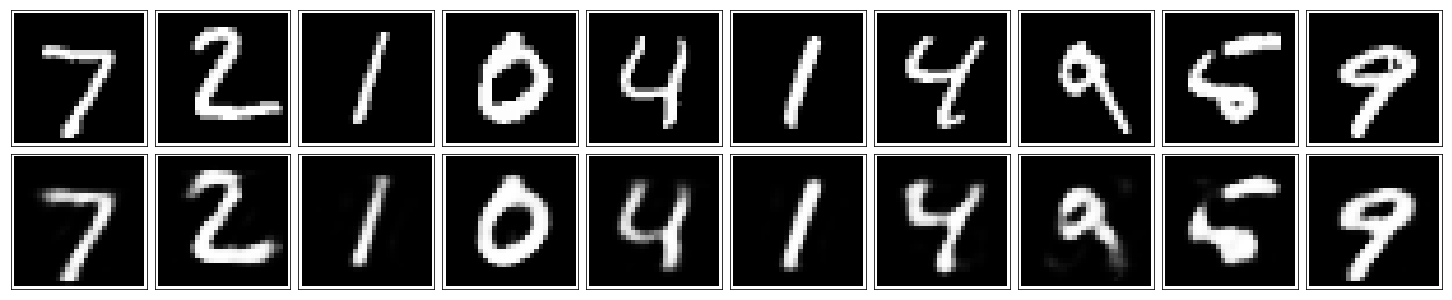

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.